# Advance HousePricePrediction 

### Data Analysis Phase

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset
data = pd.read_csv("train.csv")
pd.pandas.set_option('display.max_columns',None)

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### Data can be catogorized into two type "Numerical data" and "Categorical data" 

Step - 1 : Find the data type of each feature and segregate them for analysis using statistcal methods.


In [4]:
# Get the feature names and the type of the data present in the feature
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
numerical_data = []
categorical_data = []

for feature in data.columns :
    if(data[feature].dtype == "object"):
        categorical_data.append(feature)
    else:
        numerical_data.append(feature)


In [7]:
print("Categrical features \n\n",categorical_data,"\n\n")
print("Numerical features \n\n",numerical_data)

Categrical features 

 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] 


Numerical features 

 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCar

In [8]:
# Make dataframe for categorical features and numerical features

categorical_df = pd.read_csv("train.csv", usecols=categorical_data)
numerical_df = pd.read_csv("train.csv", usecols=numerical_data)

In [9]:
categorical_df.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [10]:
numerical_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [11]:
print("Shape - numerical_df {} \nShape - categorical_df {}".format(numerical_df.shape, categorical_df.shape))

Shape - numerical_df (1460, 38) 
Shape - categorical_df (1460, 43)


*From the above segmetation of data we found that there are **38 categorical features** and **43 numerical features** where there conrtibution to data is not neglizable. So by applying some **statistical techniques** we will figure some information about the data in the next steps*

- **First let's go with numercial varibles**

1. Numerical data is of two types "discrete" and "continous". So we find which featues are discrete and which features are continous 
2. Analyze the discrete features
3. Analyze the continous features

#### Discrete feature analysis

In [43]:

# Criteria for discrete feature : if the unique values in the feature are <25 then we say that it is a discrete and not in data time variables
year_feature = [feature for feature in numerical_df if 'Yr' in feature or 'Year' in feature]
year_feature

discrete_features = [feature for feature in numerical_df.columns if len(numerical_df[feature].unique())<25 and feature not in year_feature+['Id']]
print("No:of discrete features are:",len(discrete_features),"\n")
discrete_features



No:of discrete features are: 17 



['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [50]:
# finding null values

for feature in discrete_features:
    print("{} --- null values --- {} --- {}%".format(feature, numerical_df[feature].isnull().sum(), np.round(numerical_df[feature].isnull().mean(),4)))

MSSubClass --- null values --- 0 --- 0.0%
OverallQual --- null values --- 0 --- 0.0%
OverallCond --- null values --- 0 --- 0.0%
LowQualFinSF --- null values --- 0 --- 0.0%
BsmtFullBath --- null values --- 0 --- 0.0%
BsmtHalfBath --- null values --- 0 --- 0.0%
FullBath --- null values --- 0 --- 0.0%
HalfBath --- null values --- 0 --- 0.0%
BedroomAbvGr --- null values --- 0 --- 0.0%
KitchenAbvGr --- null values --- 0 --- 0.0%
TotRmsAbvGrd --- null values --- 0 --- 0.0%
Fireplaces --- null values --- 0 --- 0.0%
GarageCars --- null values --- 0 --- 0.0%
3SsnPorch --- null values --- 0 --- 0.0%
PoolArea --- null values --- 0 --- 0.0%
MiscVal --- null values --- 0 --- 0.0%
MoSold --- null values --- 0 --- 0.0%


*No null values in discrete fearutes*. So we can proceed with the direct analysis

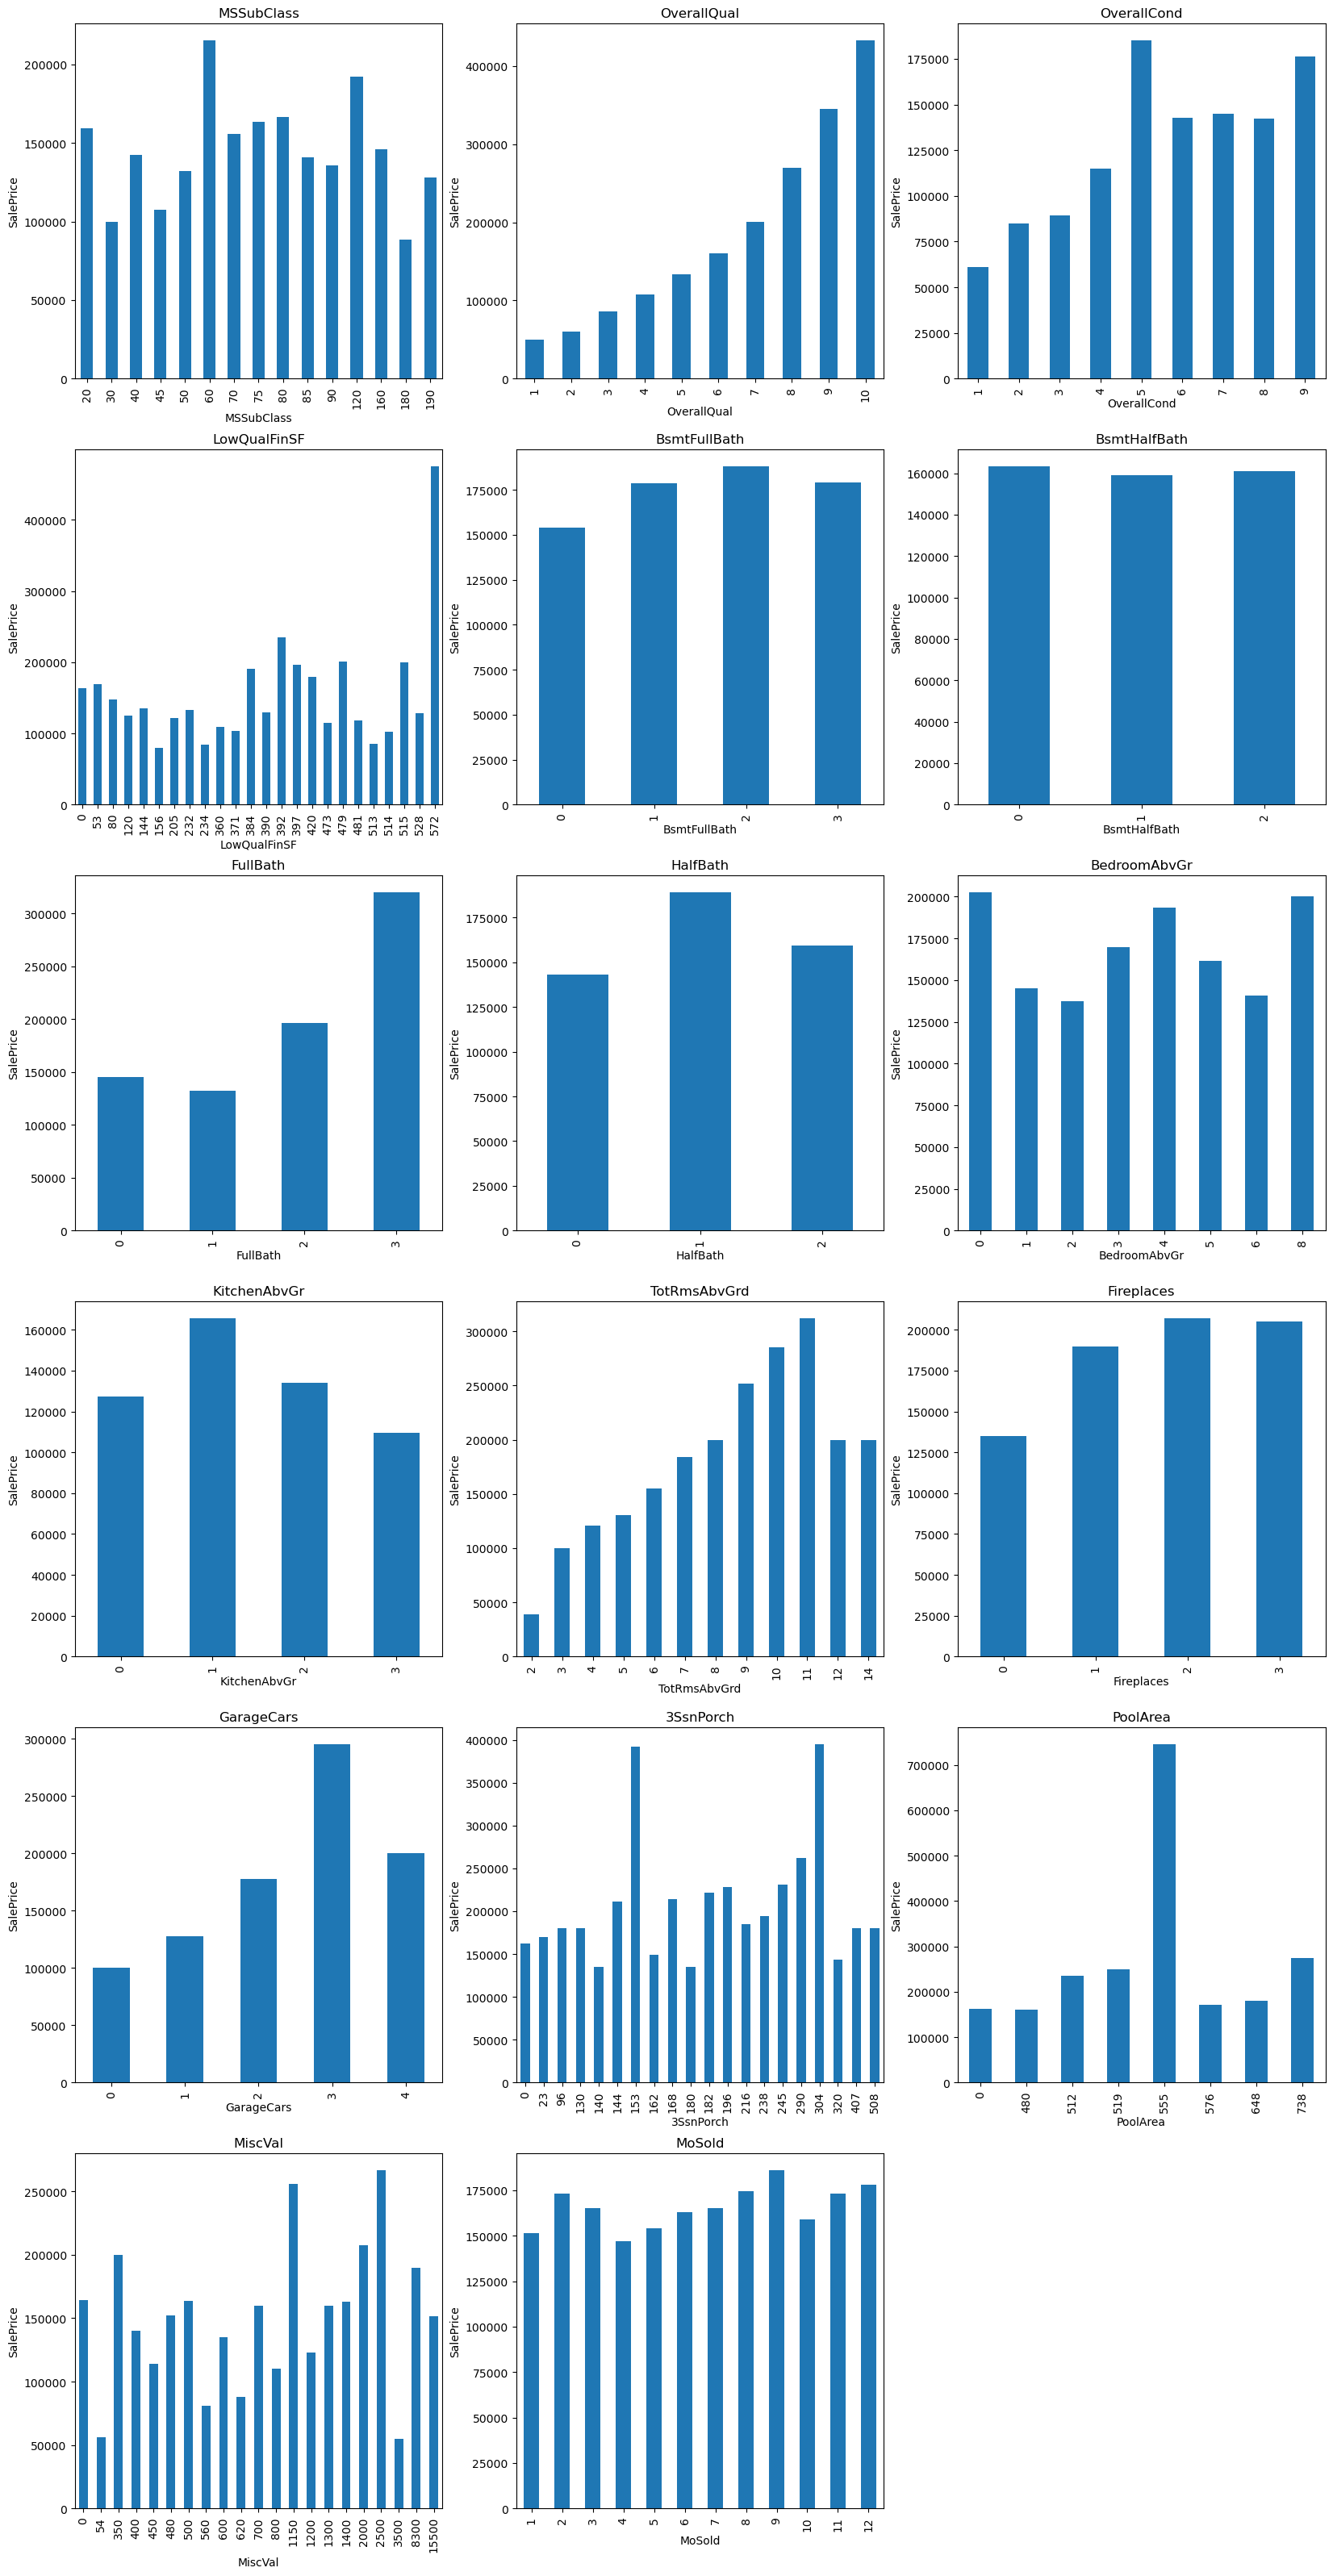

In [79]:
# Find the relation between each discrete feature and saleprice of house
plt.figure(figsize=(20,40))

for val in enumerate(discrete_features):
    plt.subplot(6,3, val[0]+1)
    numerical_df.groupby(val[1])['SalePrice'].median().plot.bar()
    plt.xlabel(val[1])
    plt.ylabel("SalePrice")
    plt.title(val[1])
    
    

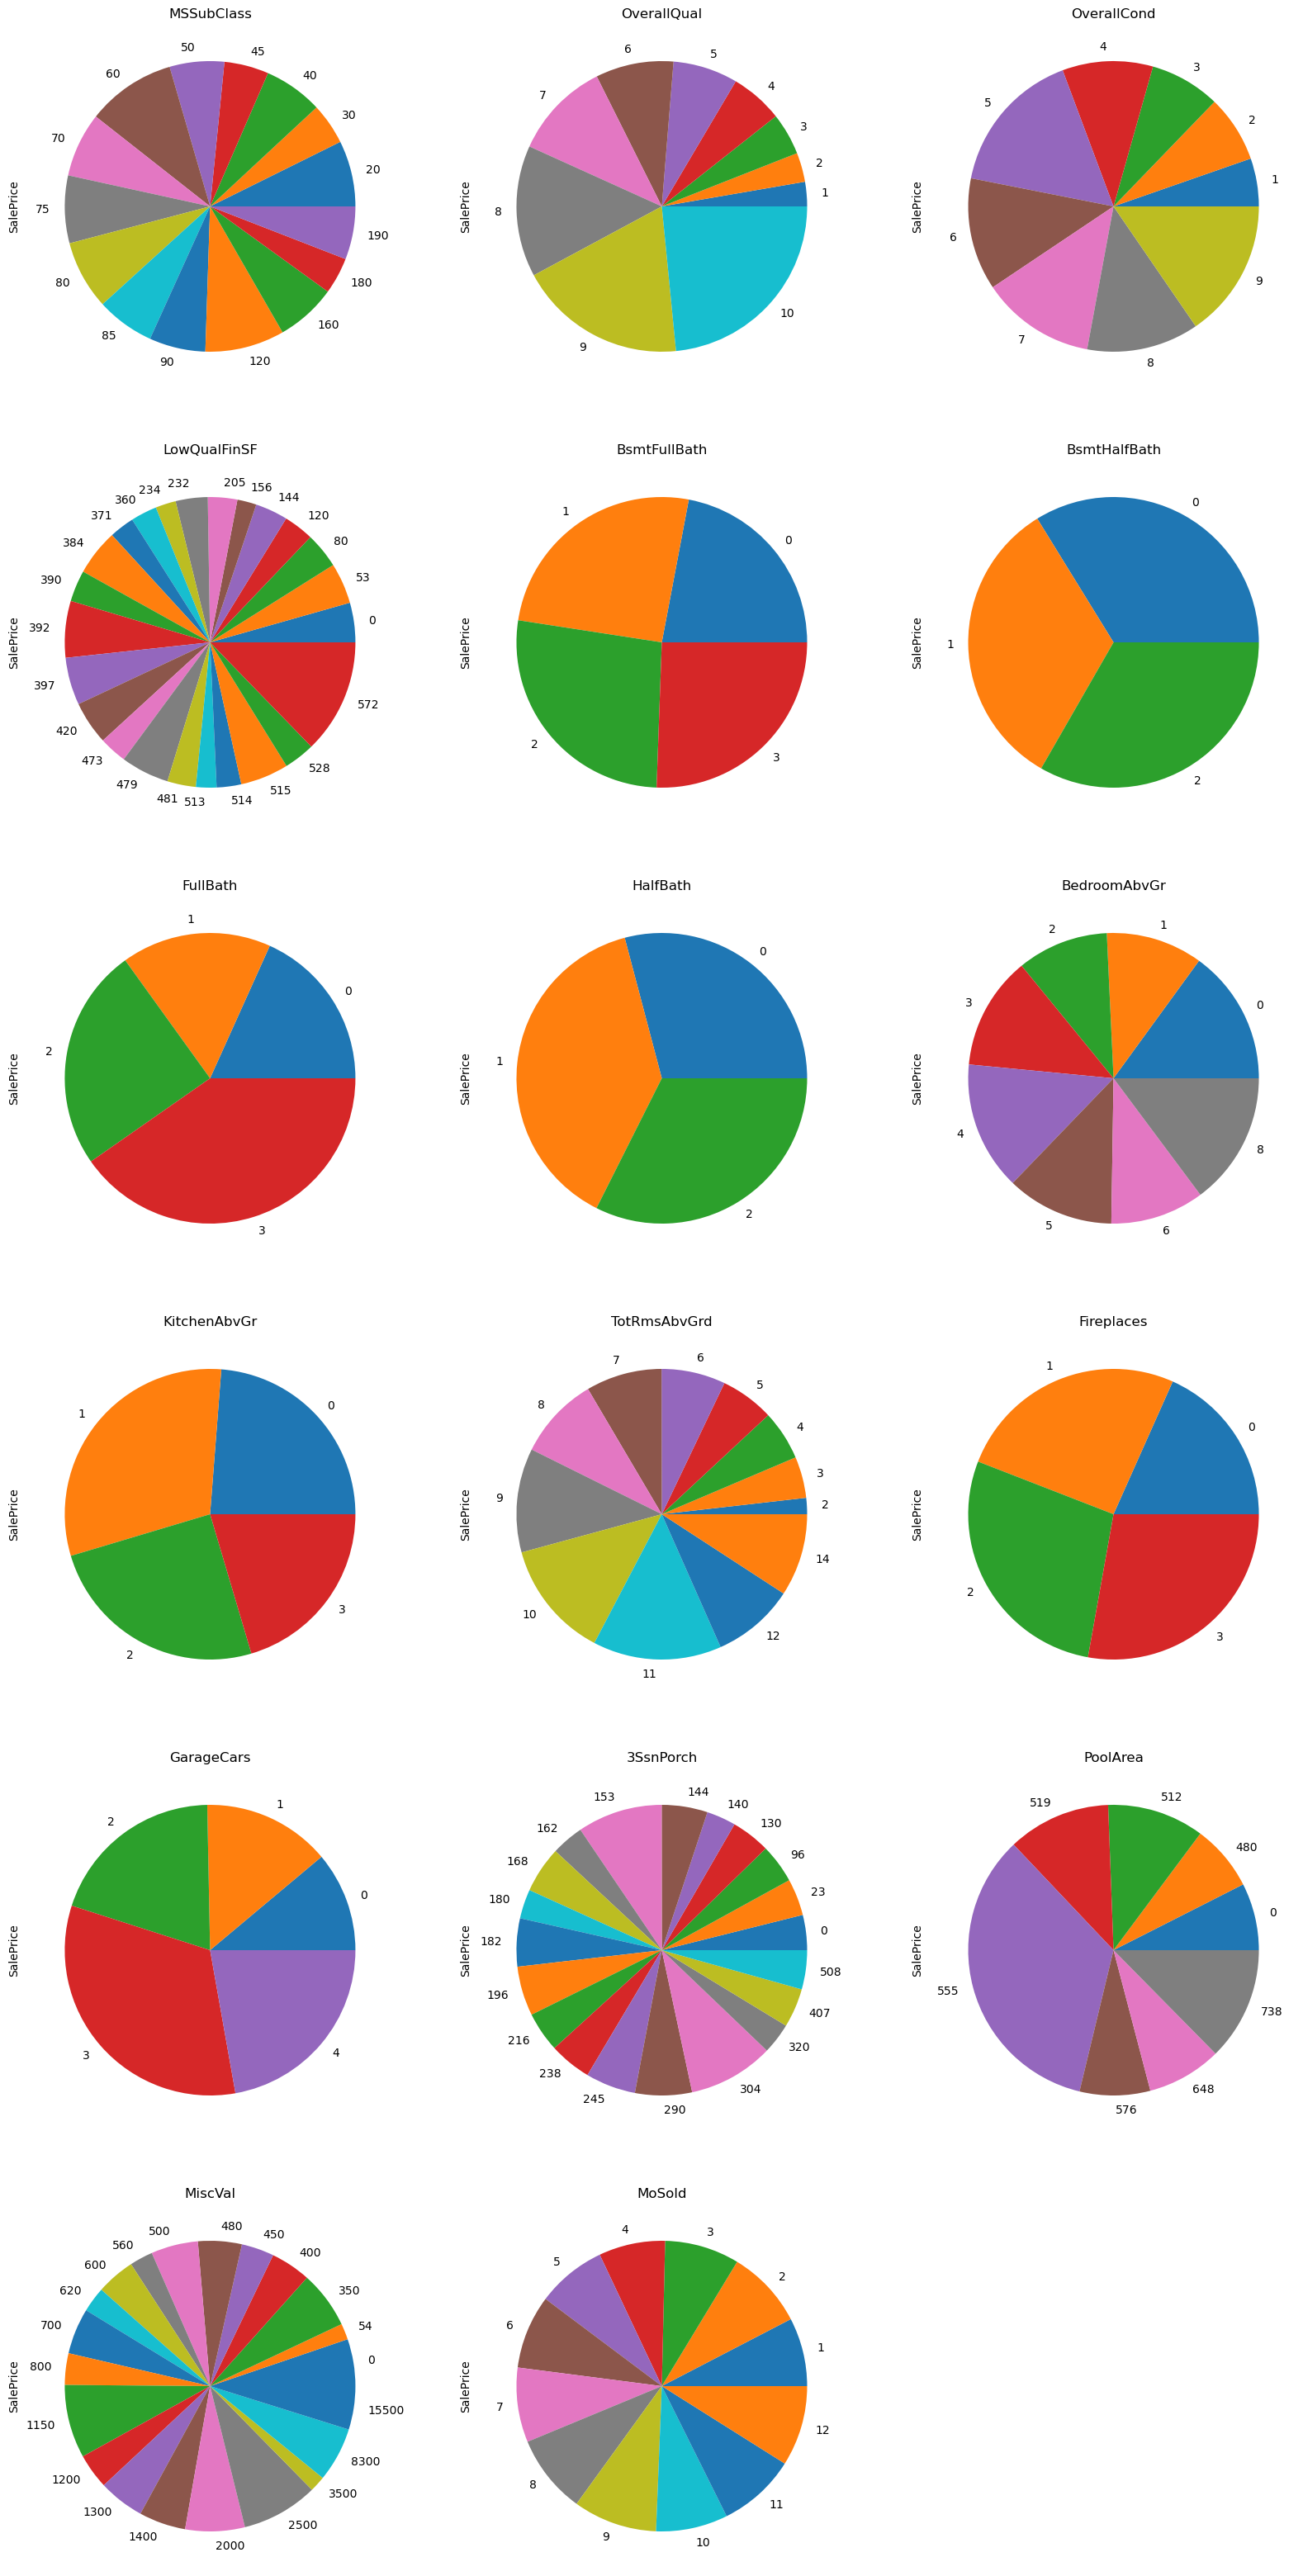

In [28]:
plt.figure(figsize=(20,40))

for val in enumerate(discrete_features):
    plt.subplot(6,3, val[0]+1)
    numerical_df.groupby(val[1])['SalePrice'].median().plot.pie()
    plt.title(val[1])
    

- From the above charts we can observe linear relation on "OverallQual", "OverallCond", "TotRmsAbvGrd", "GarageCars" and "Saleprice" of the house.
- The other features has varying relation which says that they are important and to be considerd for further process

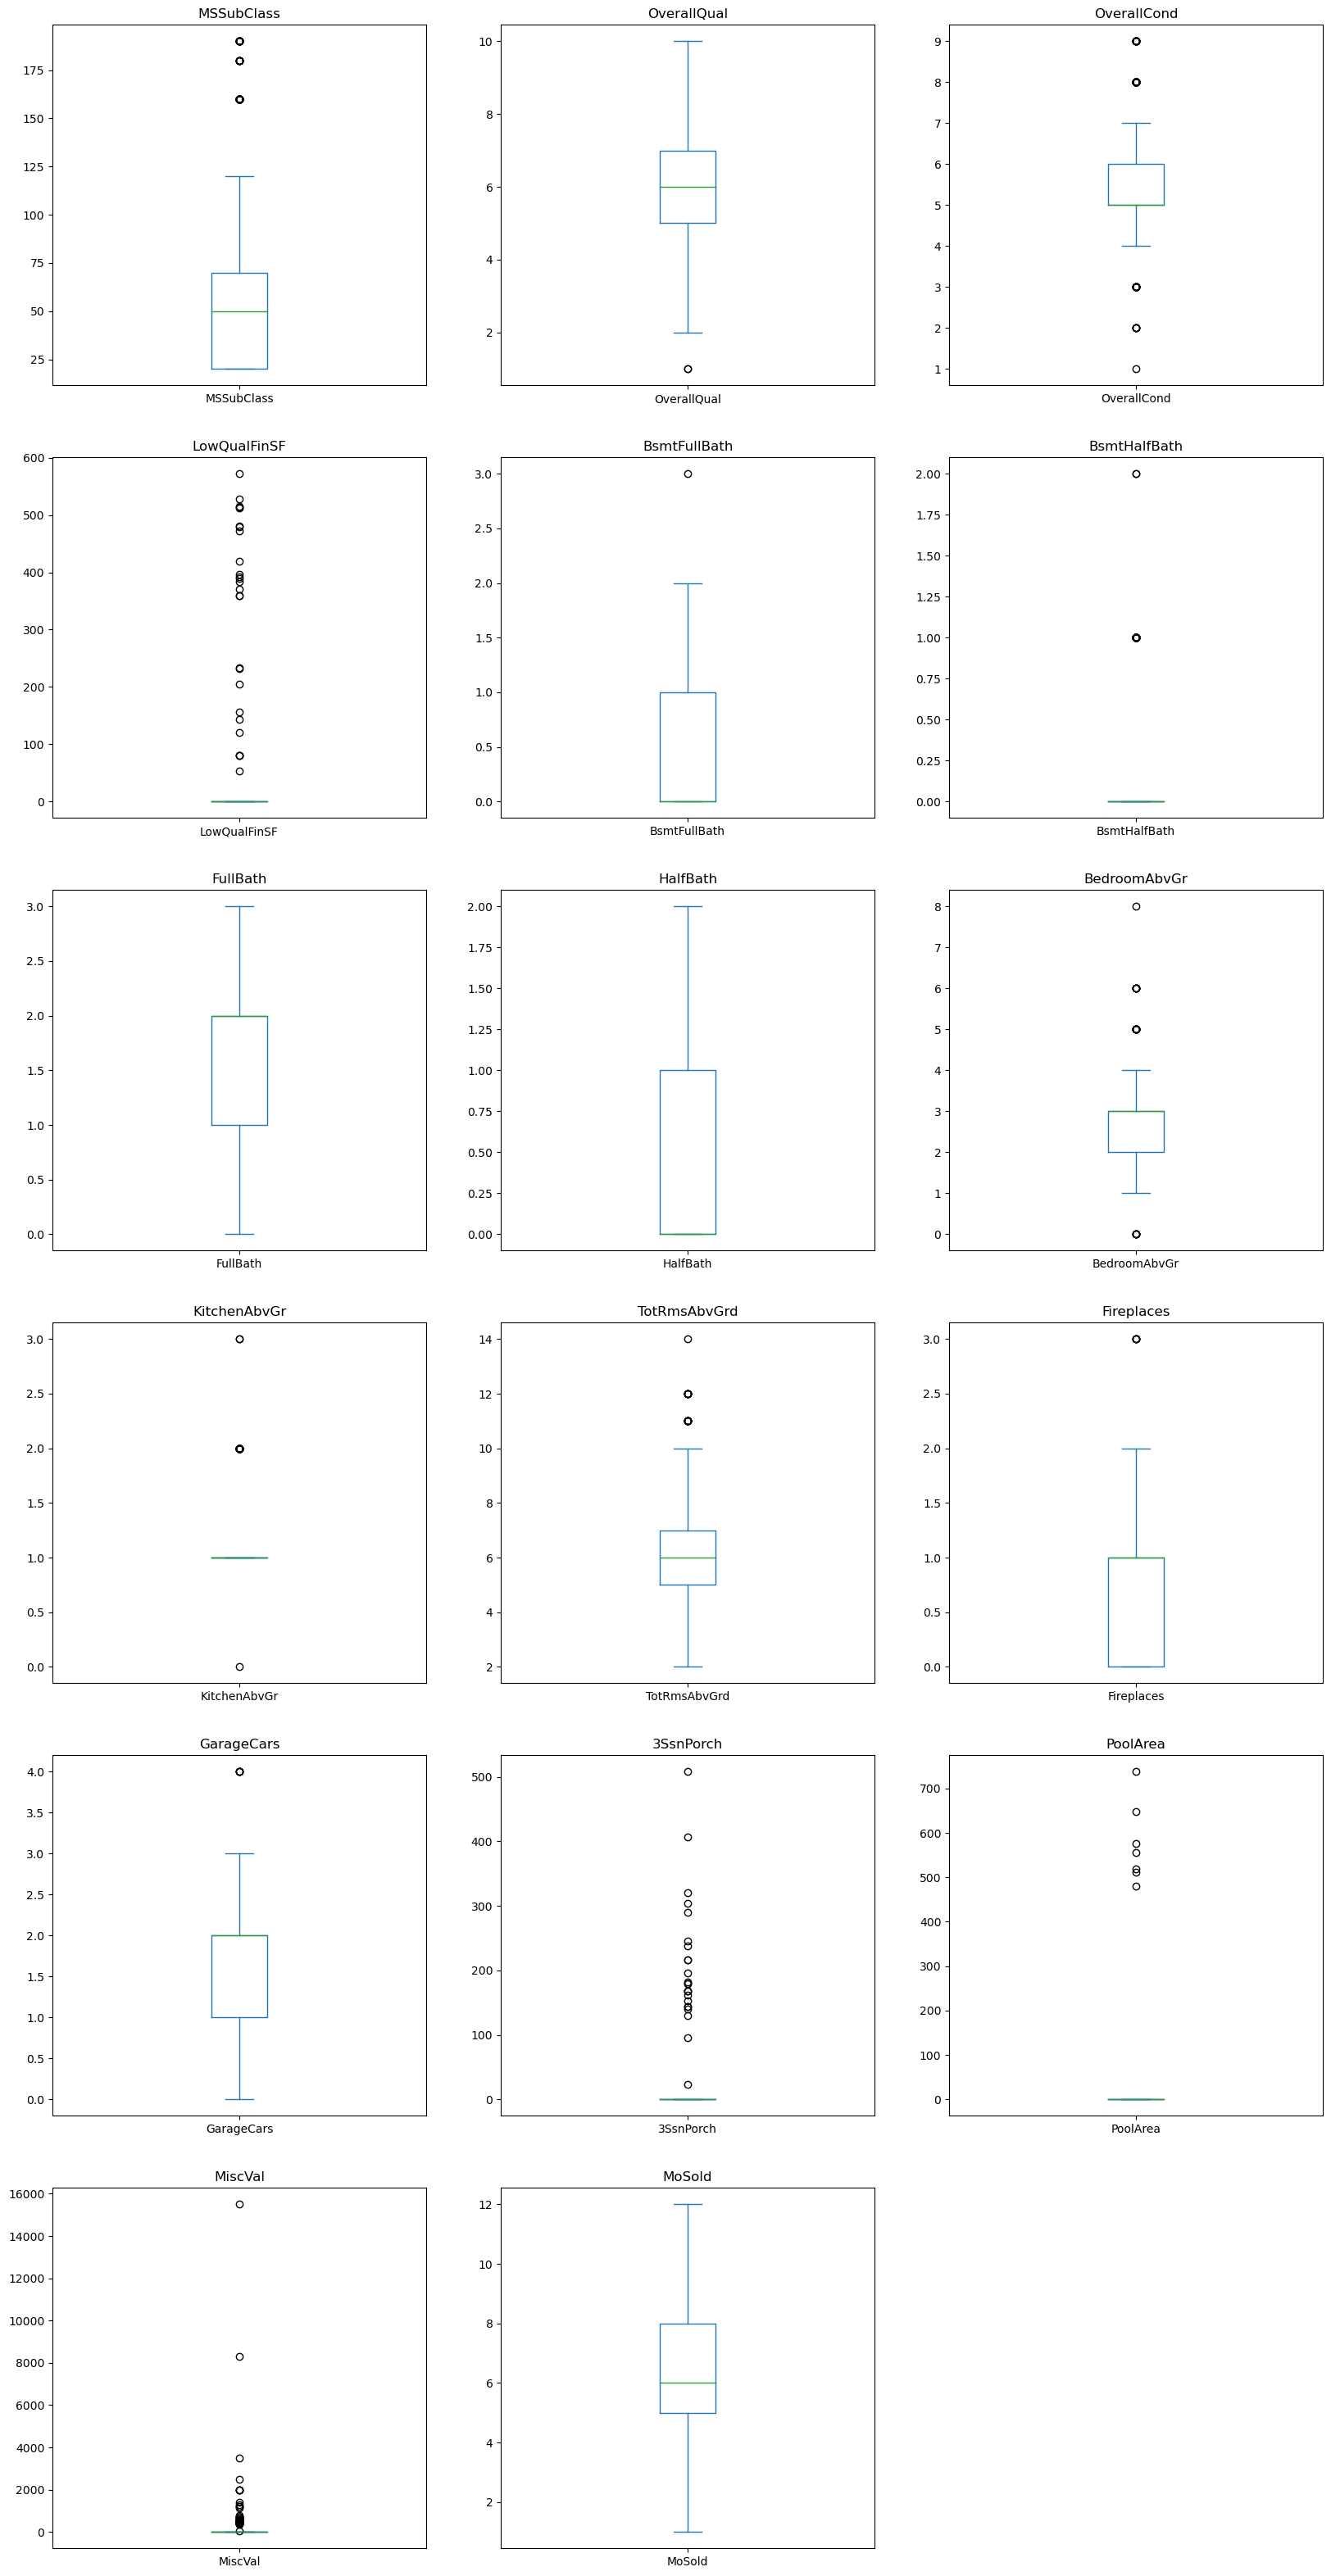

In [131]:
# finding outliers
plt.figure(figsize=(20,40))

for val in enumerate(discrete_features):
    plt.subplot(6,3, val[0]+1)
    numerical_df[val[1]].plot.box()
    plt.title(val[1])

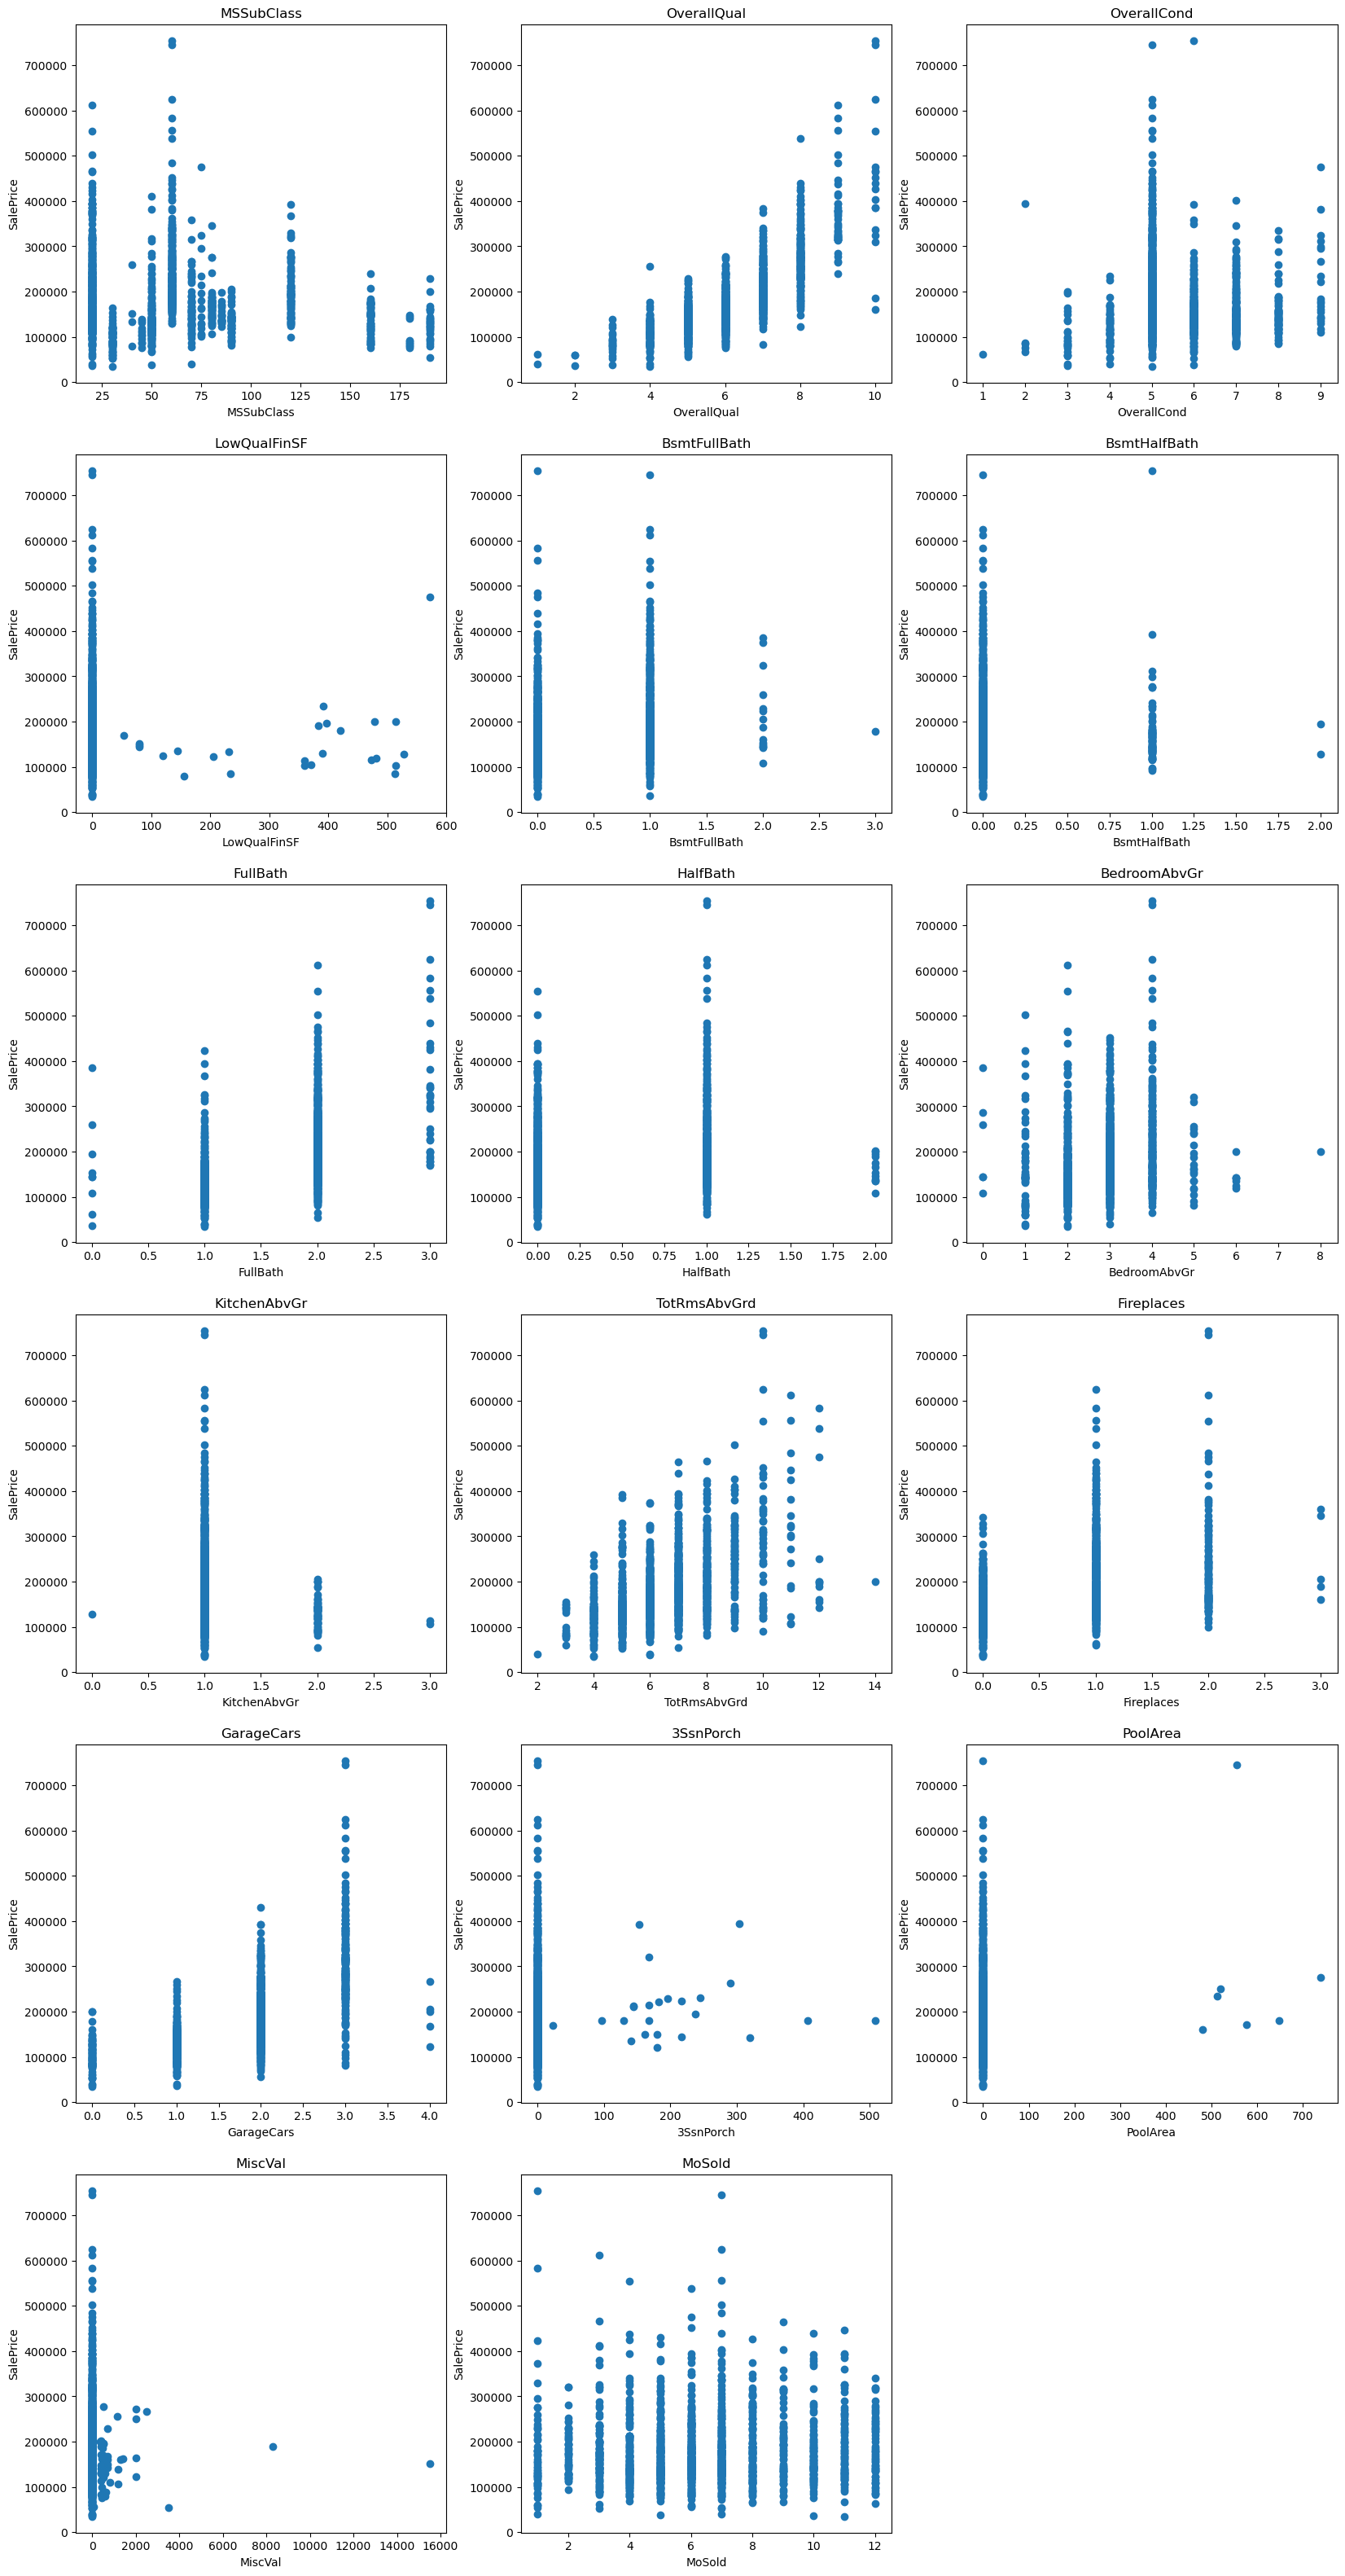

In [136]:
# make scatter plot to find relation between predictor and target variable
# Find the relation between each discrete feature and saleprice of house
plt.figure(figsize=(20,40))

for val in enumerate(discrete_features):
    plt.subplot(6,3, val[0]+1)
    plt.scatter(numerical_df[val[1]],data['SalePrice'])
    plt.xlabel(val[1])
    plt.ylabel("SalePrice")
    plt.title(val[1])

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


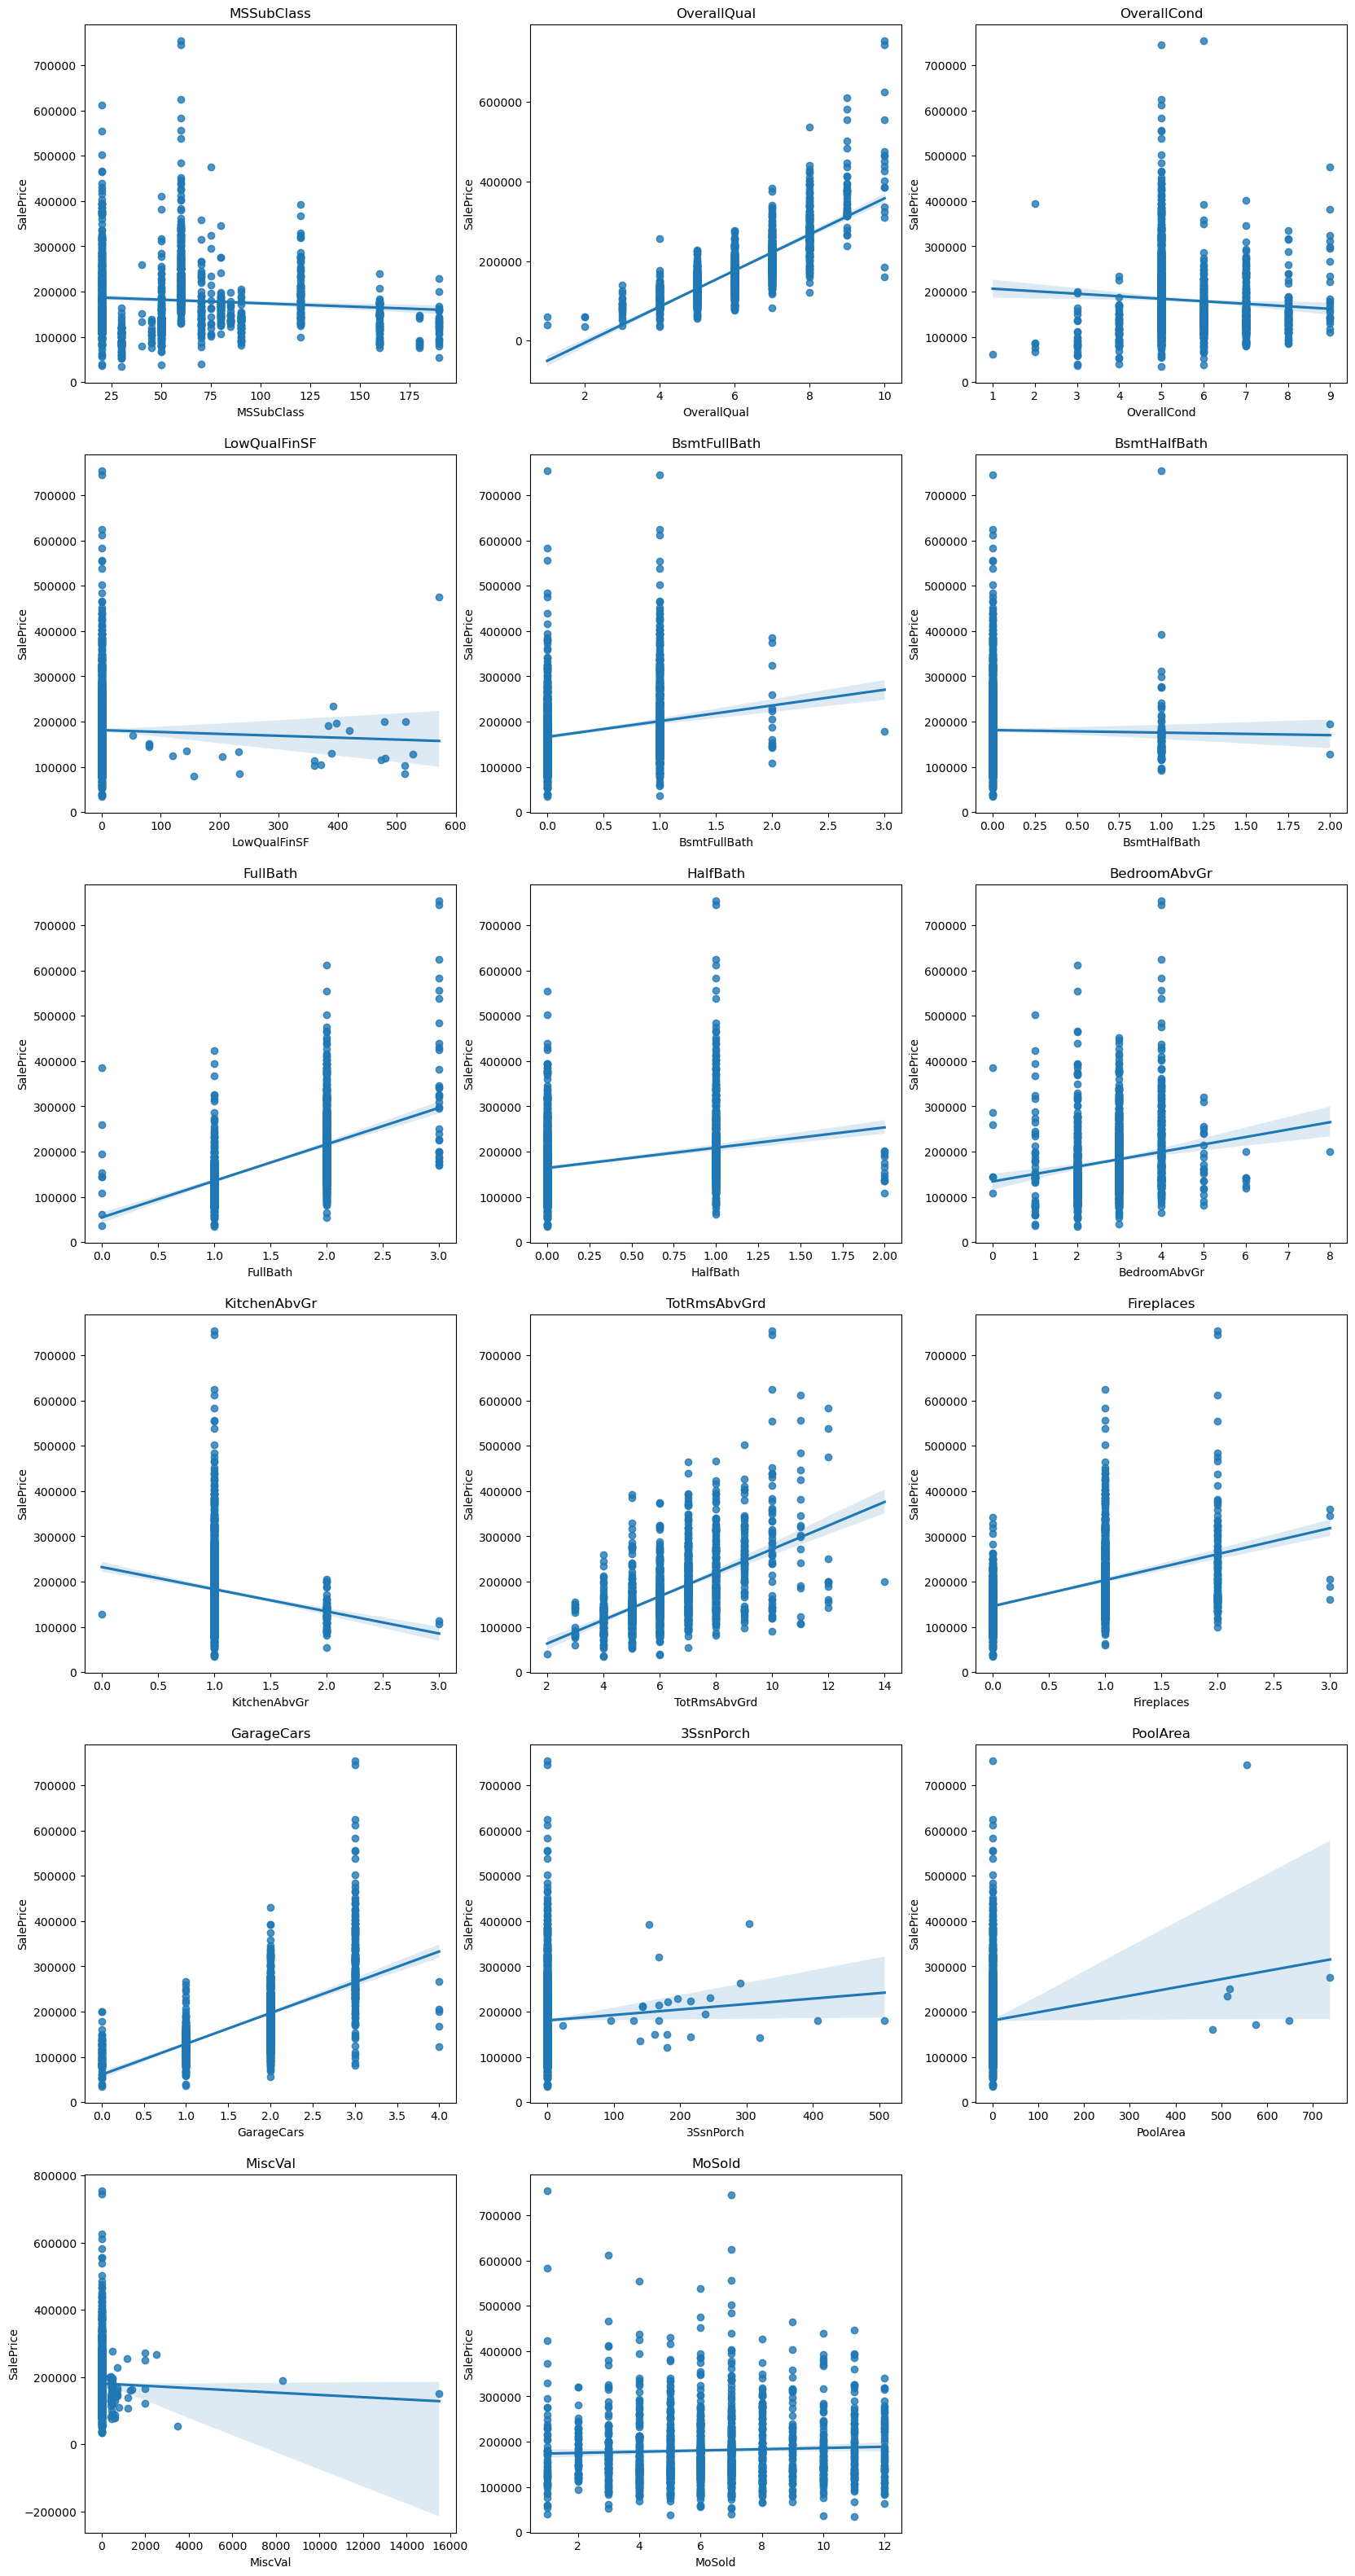

In [137]:
plt.figure(figsize=(20,40))

for val in enumerate(discrete_features):
    plt.subplot(6,3, val[0]+1)
    sns.regplot(numerical_df[val[1]],data['SalePrice'])
    plt.xlabel(val[1])
    plt.ylabel("SalePrice")
    plt.title(val[1])

### Analysis for discrete numerical features

**From the above graphs we can conclude that :**
- The features *'MSSubClass', 'BsmtFullBath', 'BsmtHalfBath', 'LowQualFinSF', 'MiscVal','MoSold'* have a constant relationship with saleprice
- This means for every value in the feature the saleprice is almost the same and it doesnot contribute to increse or decrese in the saleprice
- So we can neglect these features for our model and also for further analysis
- The others show some relation between the saleprice and we have to consider them.


#### Continous feature analysis

In [47]:
# The features which are not in discrete and they are not data-time features are continous
continous_features = [feature for feature in numerical_data if feature not in discrete_features and feature not in year_feature+['Id']]
print("No:of discrete features are:",len(continous_features),"\n")
continous_features


No:of discrete features are: 16 



['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [49]:
# find the null values
for feature in continous_features:
    print("{} --- null values --- {} --- {}%".format(feature, numerical_df[feature].isnull().sum(), np.round(numerical_df[feature].isnull().mean(),4)))

LotFrontage --- null values --- 259 --- 0.1774%
LotArea --- null values --- 0 --- 0.0%
MasVnrArea --- null values --- 8 --- 0.0055%
BsmtFinSF1 --- null values --- 0 --- 0.0%
BsmtFinSF2 --- null values --- 0 --- 0.0%
BsmtUnfSF --- null values --- 0 --- 0.0%
TotalBsmtSF --- null values --- 0 --- 0.0%
1stFlrSF --- null values --- 0 --- 0.0%
2ndFlrSF --- null values --- 0 --- 0.0%
GrLivArea --- null values --- 0 --- 0.0%
GarageArea --- null values --- 0 --- 0.0%
WoodDeckSF --- null values --- 0 --- 0.0%
OpenPorchSF --- null values --- 0 --- 0.0%
EnclosedPorch --- null values --- 0 --- 0.0%
ScreenPorch --- null values --- 0 --- 0.0%
SalePrice --- null values --- 0 --- 0.0%


- There are two features which has null values "LotFrontage" and "MasVnrArea". We need to analyze them

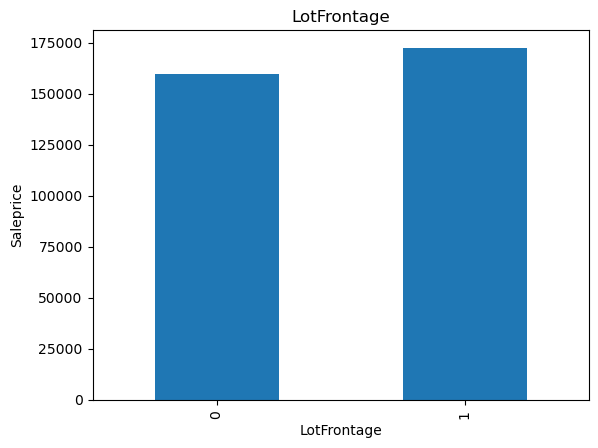

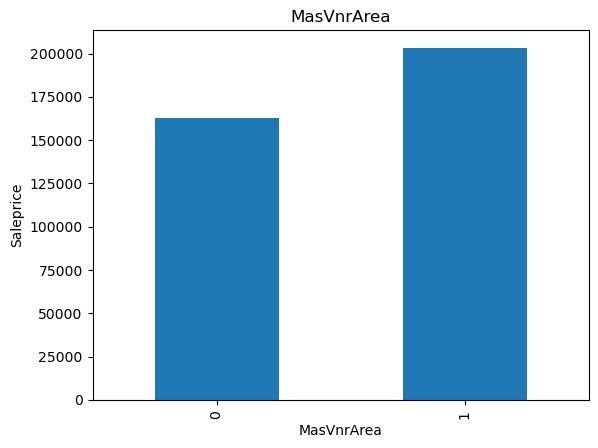

In [104]:
# analysis of null features
continous_null_features = [feature for feature in continous_features if numerical_df[feature].isnull().sum() != 0]
temp_df = numerical_df[continous_features].copy()

# Where ever we have null values for the selected features replace them with 1 and other with 0

for val in enumerate(continous_null_features):
    temp_df[val[1]]= np.where(temp_df[val[1]].isnull(),1,0)
    temp_df.groupby(val[1])['SalePrice'].median().plot.bar()
    plt.xlabel(val[1])
    plt.ylabel("Saleprice")
    plt.title(val[1])
    plt.show()

- This says that these are very importatnt and null values should be replaced

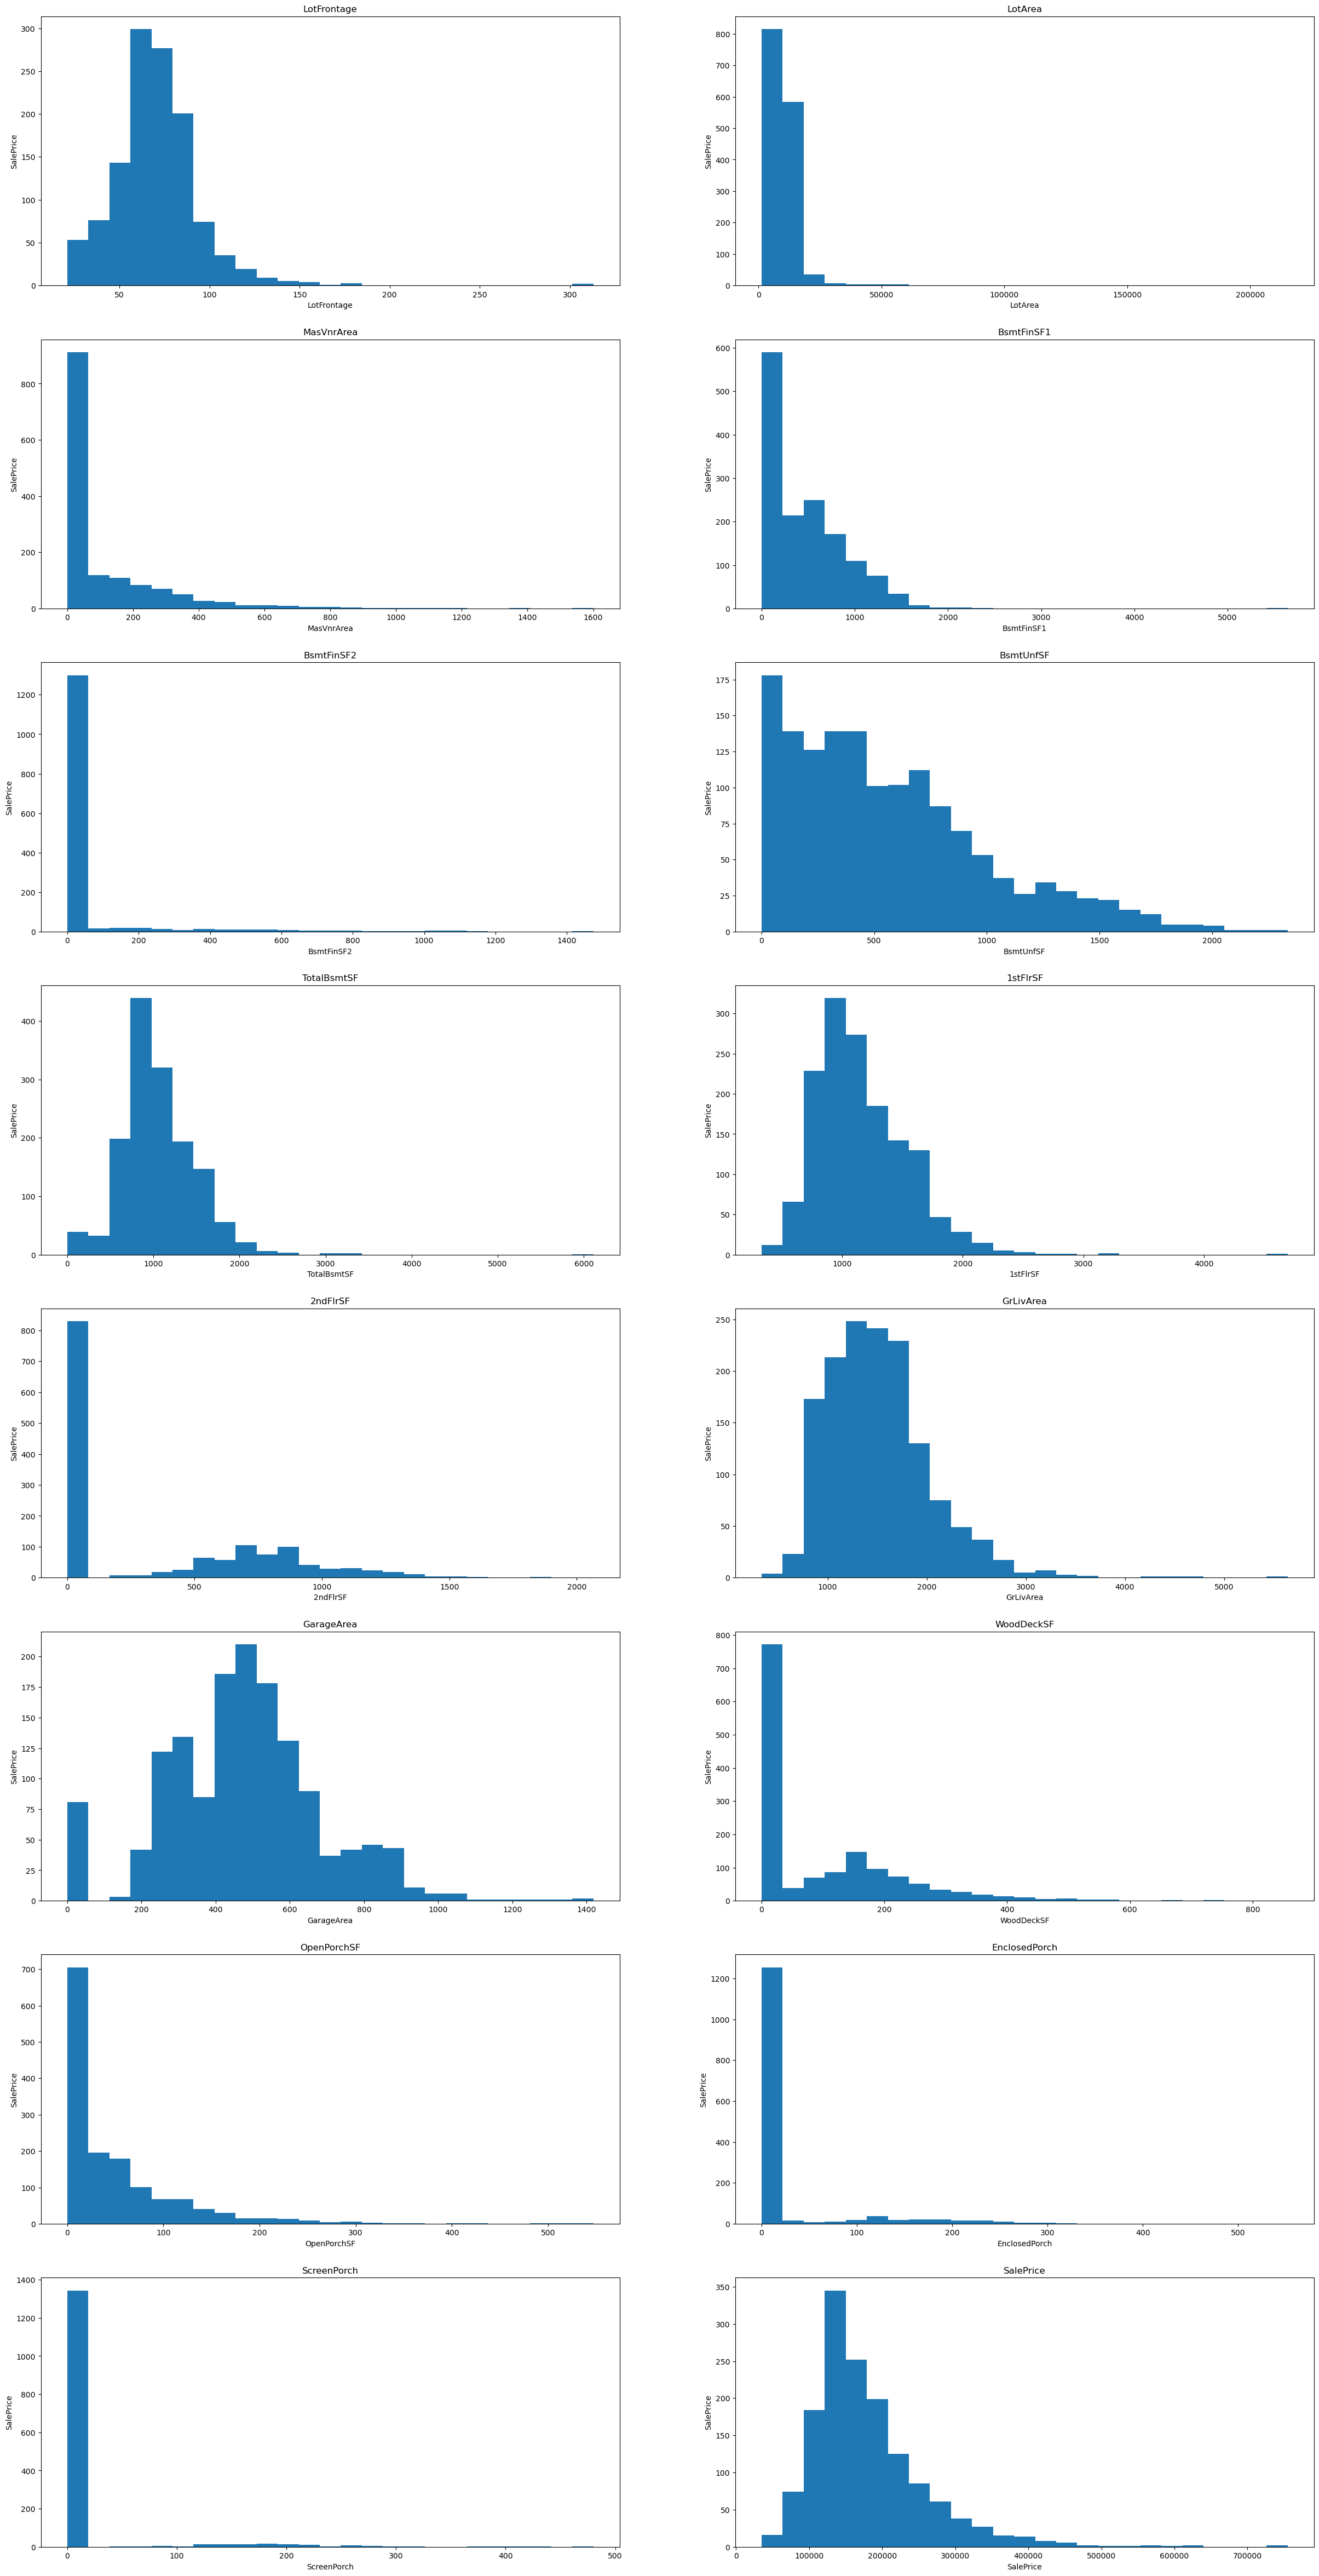

In [142]:
# analysis of features
plt.figure(figsize=(30,60))

for val in enumerate(continous_features) :
        plt.subplot(8,2,val[0]+1)
        numerical_df[val[1]].plot.hist(bins=25)
        plt.xlabel(val[1])
        plt.ylabel("SalePrice")
        plt.title(val[1])

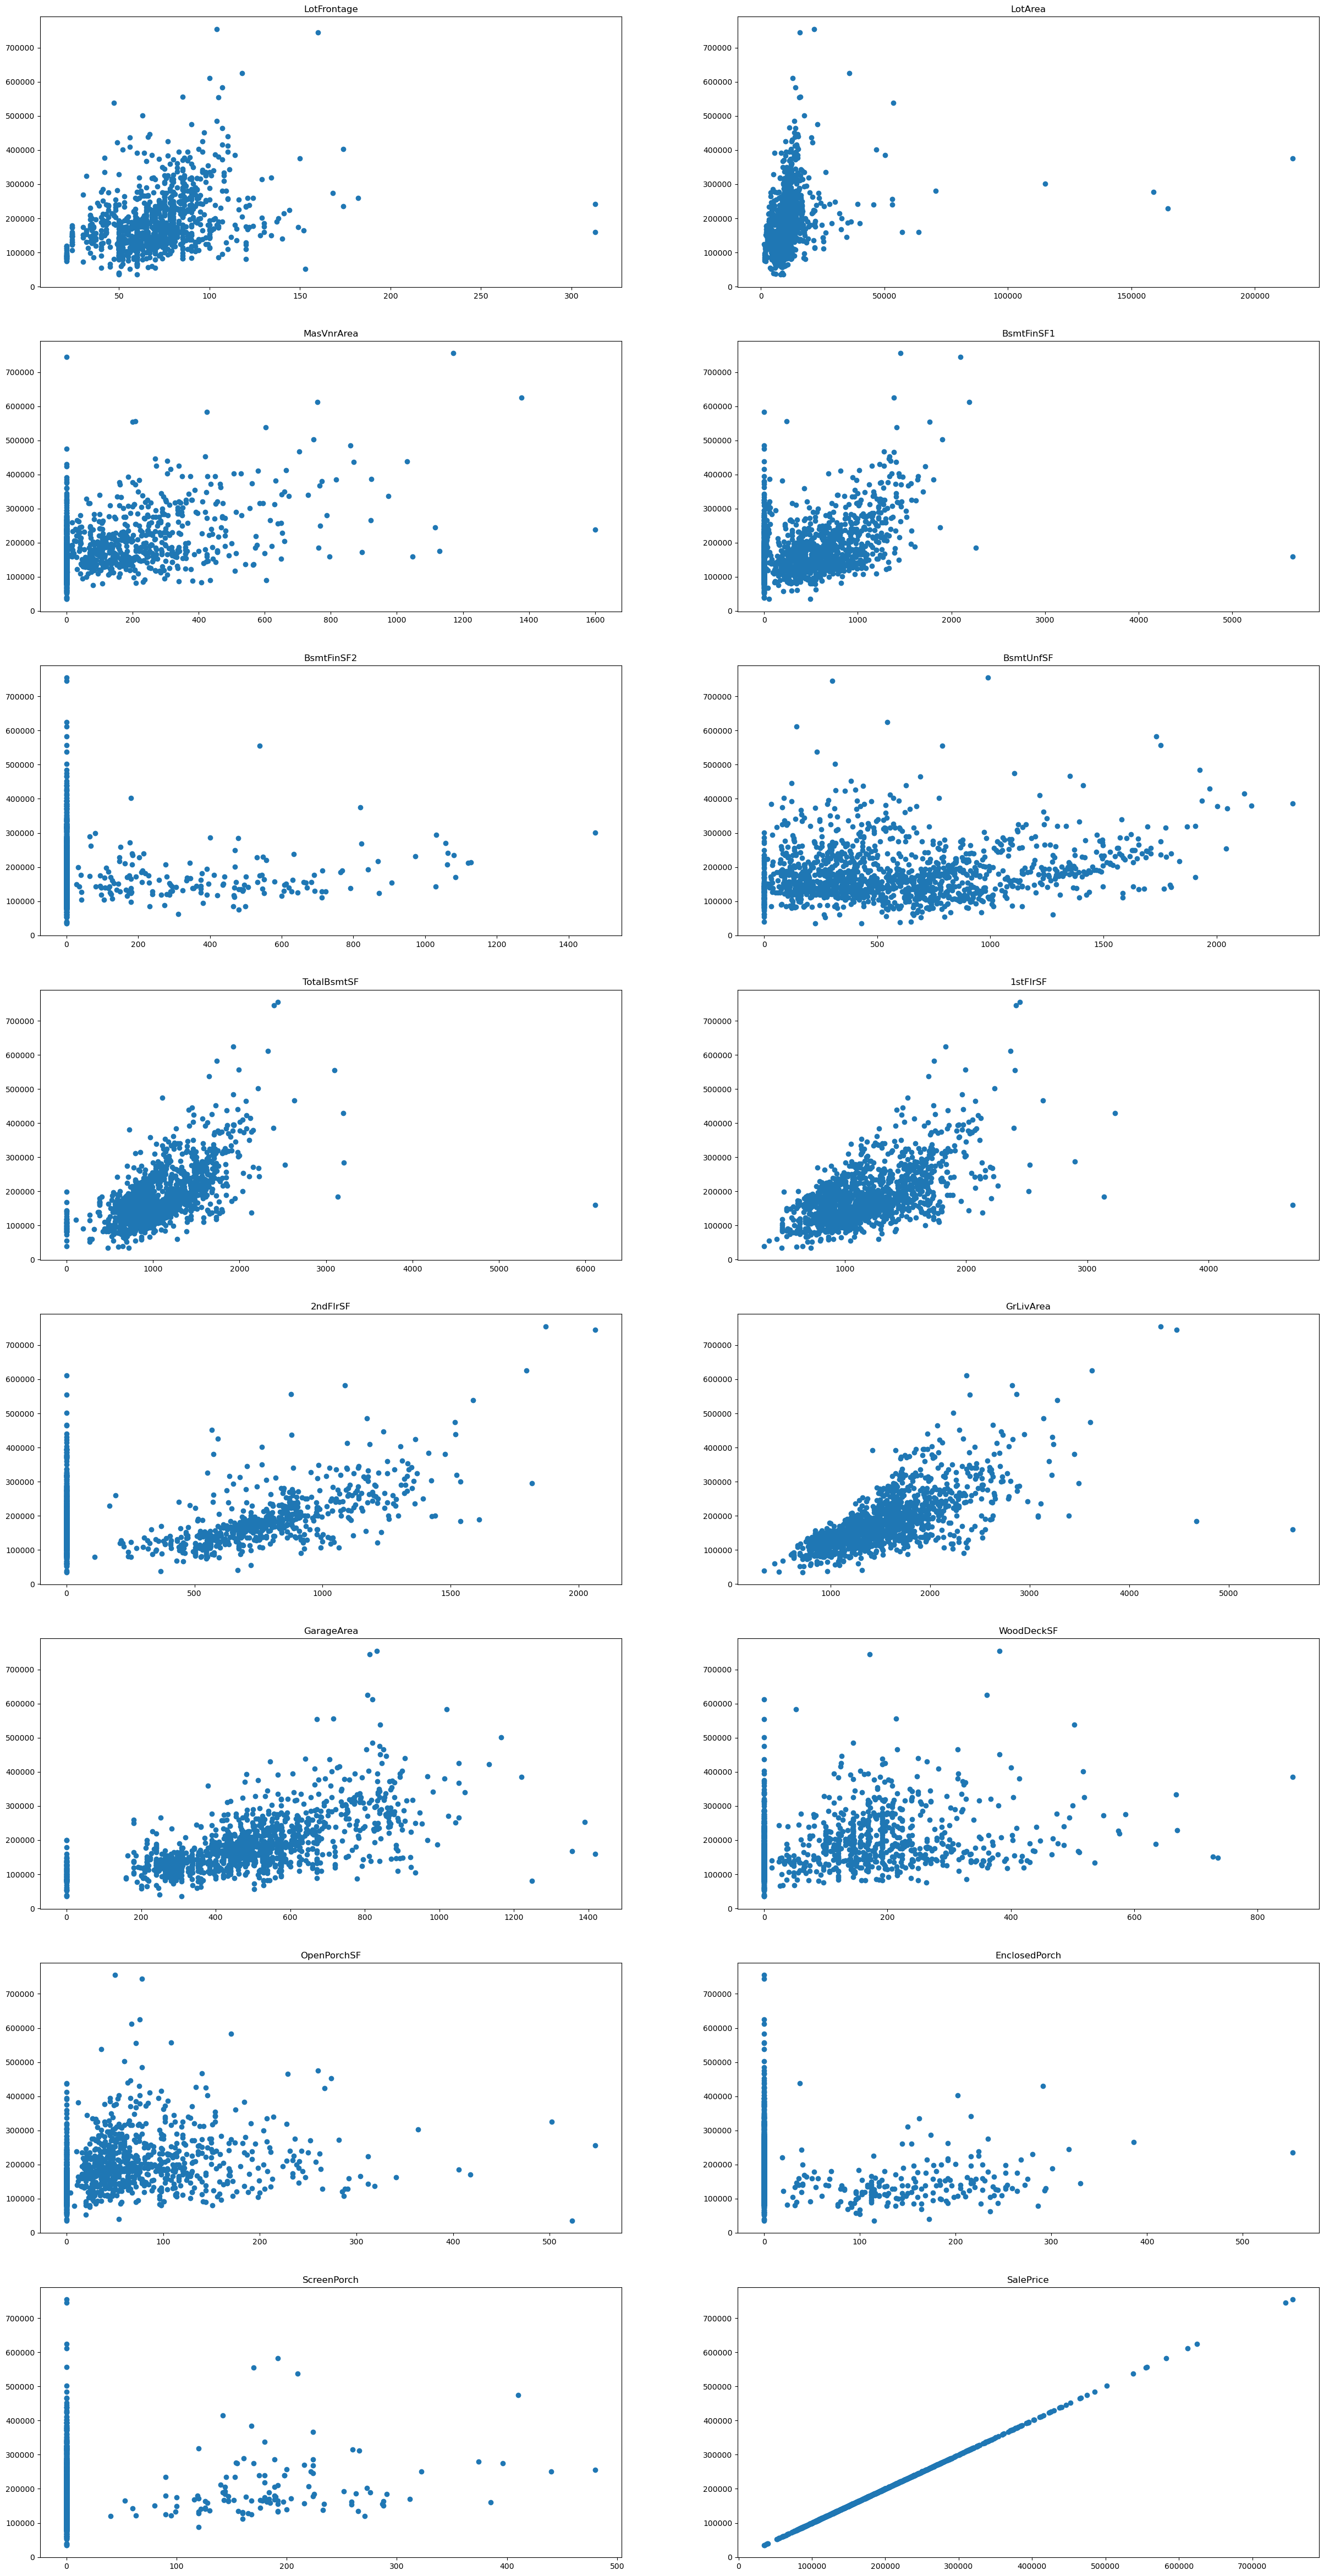

In [140]:
# analysis of  features
plt.figure(figsize=(30,60))

for val in enumerate(continous_features) :
        plt.subplot(8,2,val[0]+1)
        plt.scatter(numerical_df[val[1]],data['SalePrice'])
        plt.title(val[1])
        

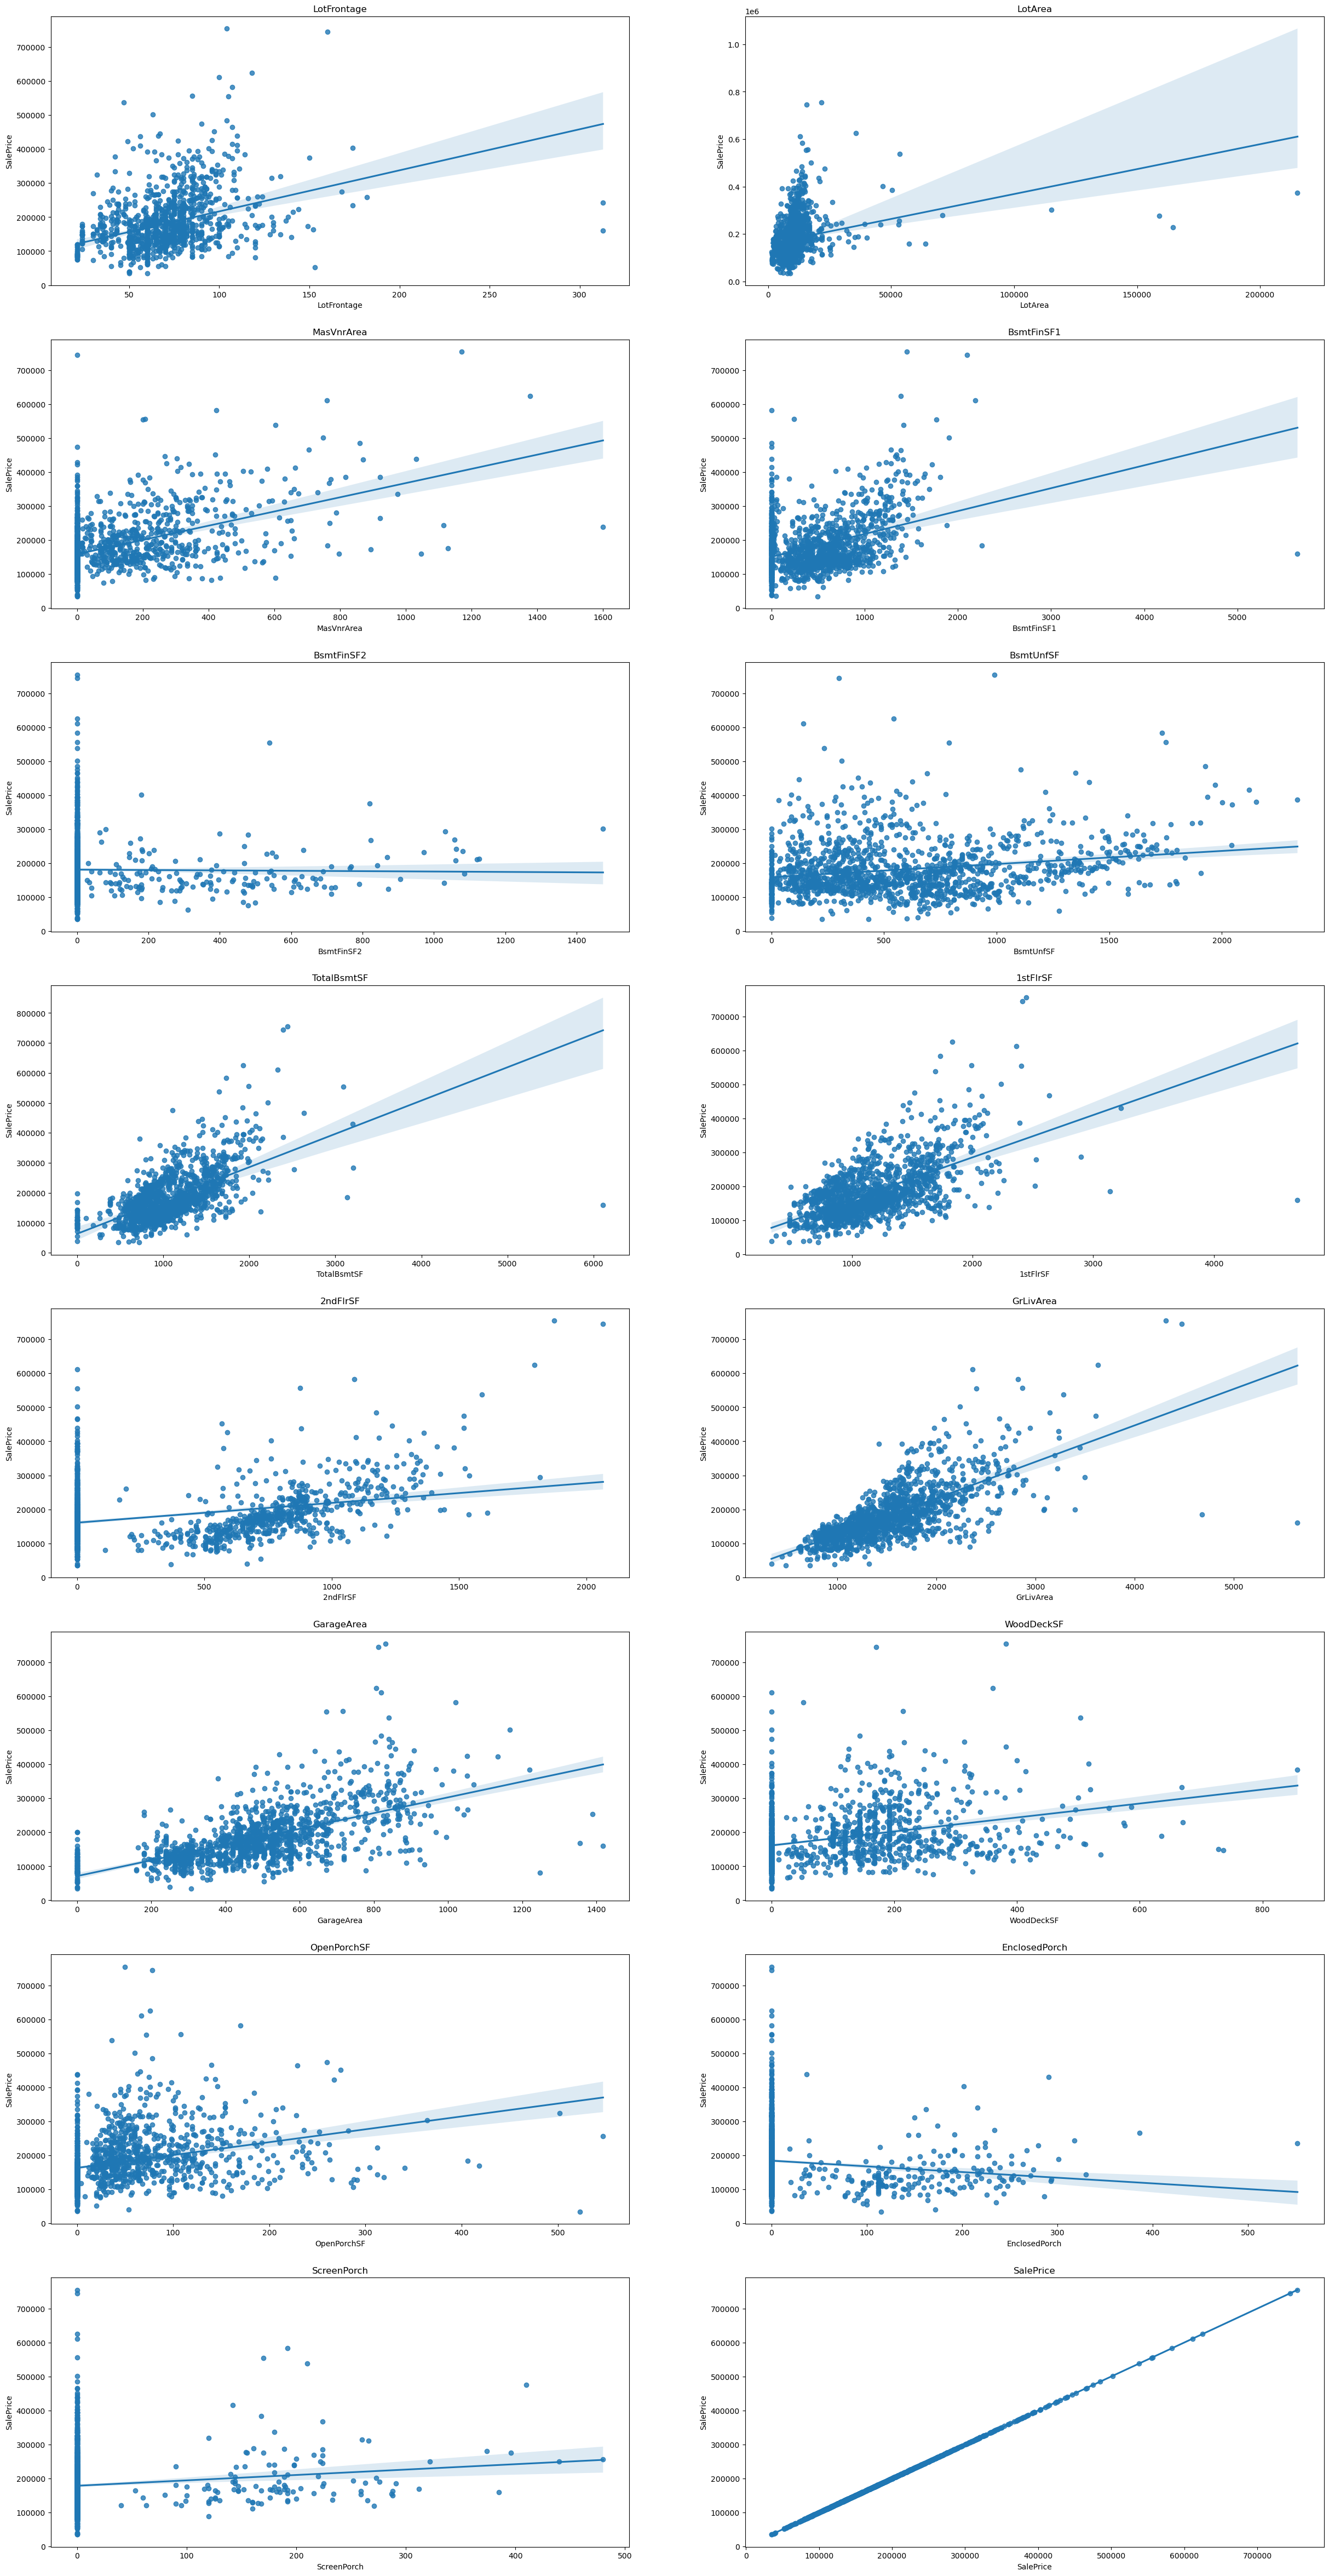

In [141]:
plt.figure(figsize=(30,60))

for val in enumerate(continous_features) :
        plt.subplot(8,2,val[0]+1)
        sns.regplot(numerical_df[val[1]],data['SalePrice'])
        plt.title(val[1])

- From the above graphs we can conclude some follow gaussain distribution and others don't

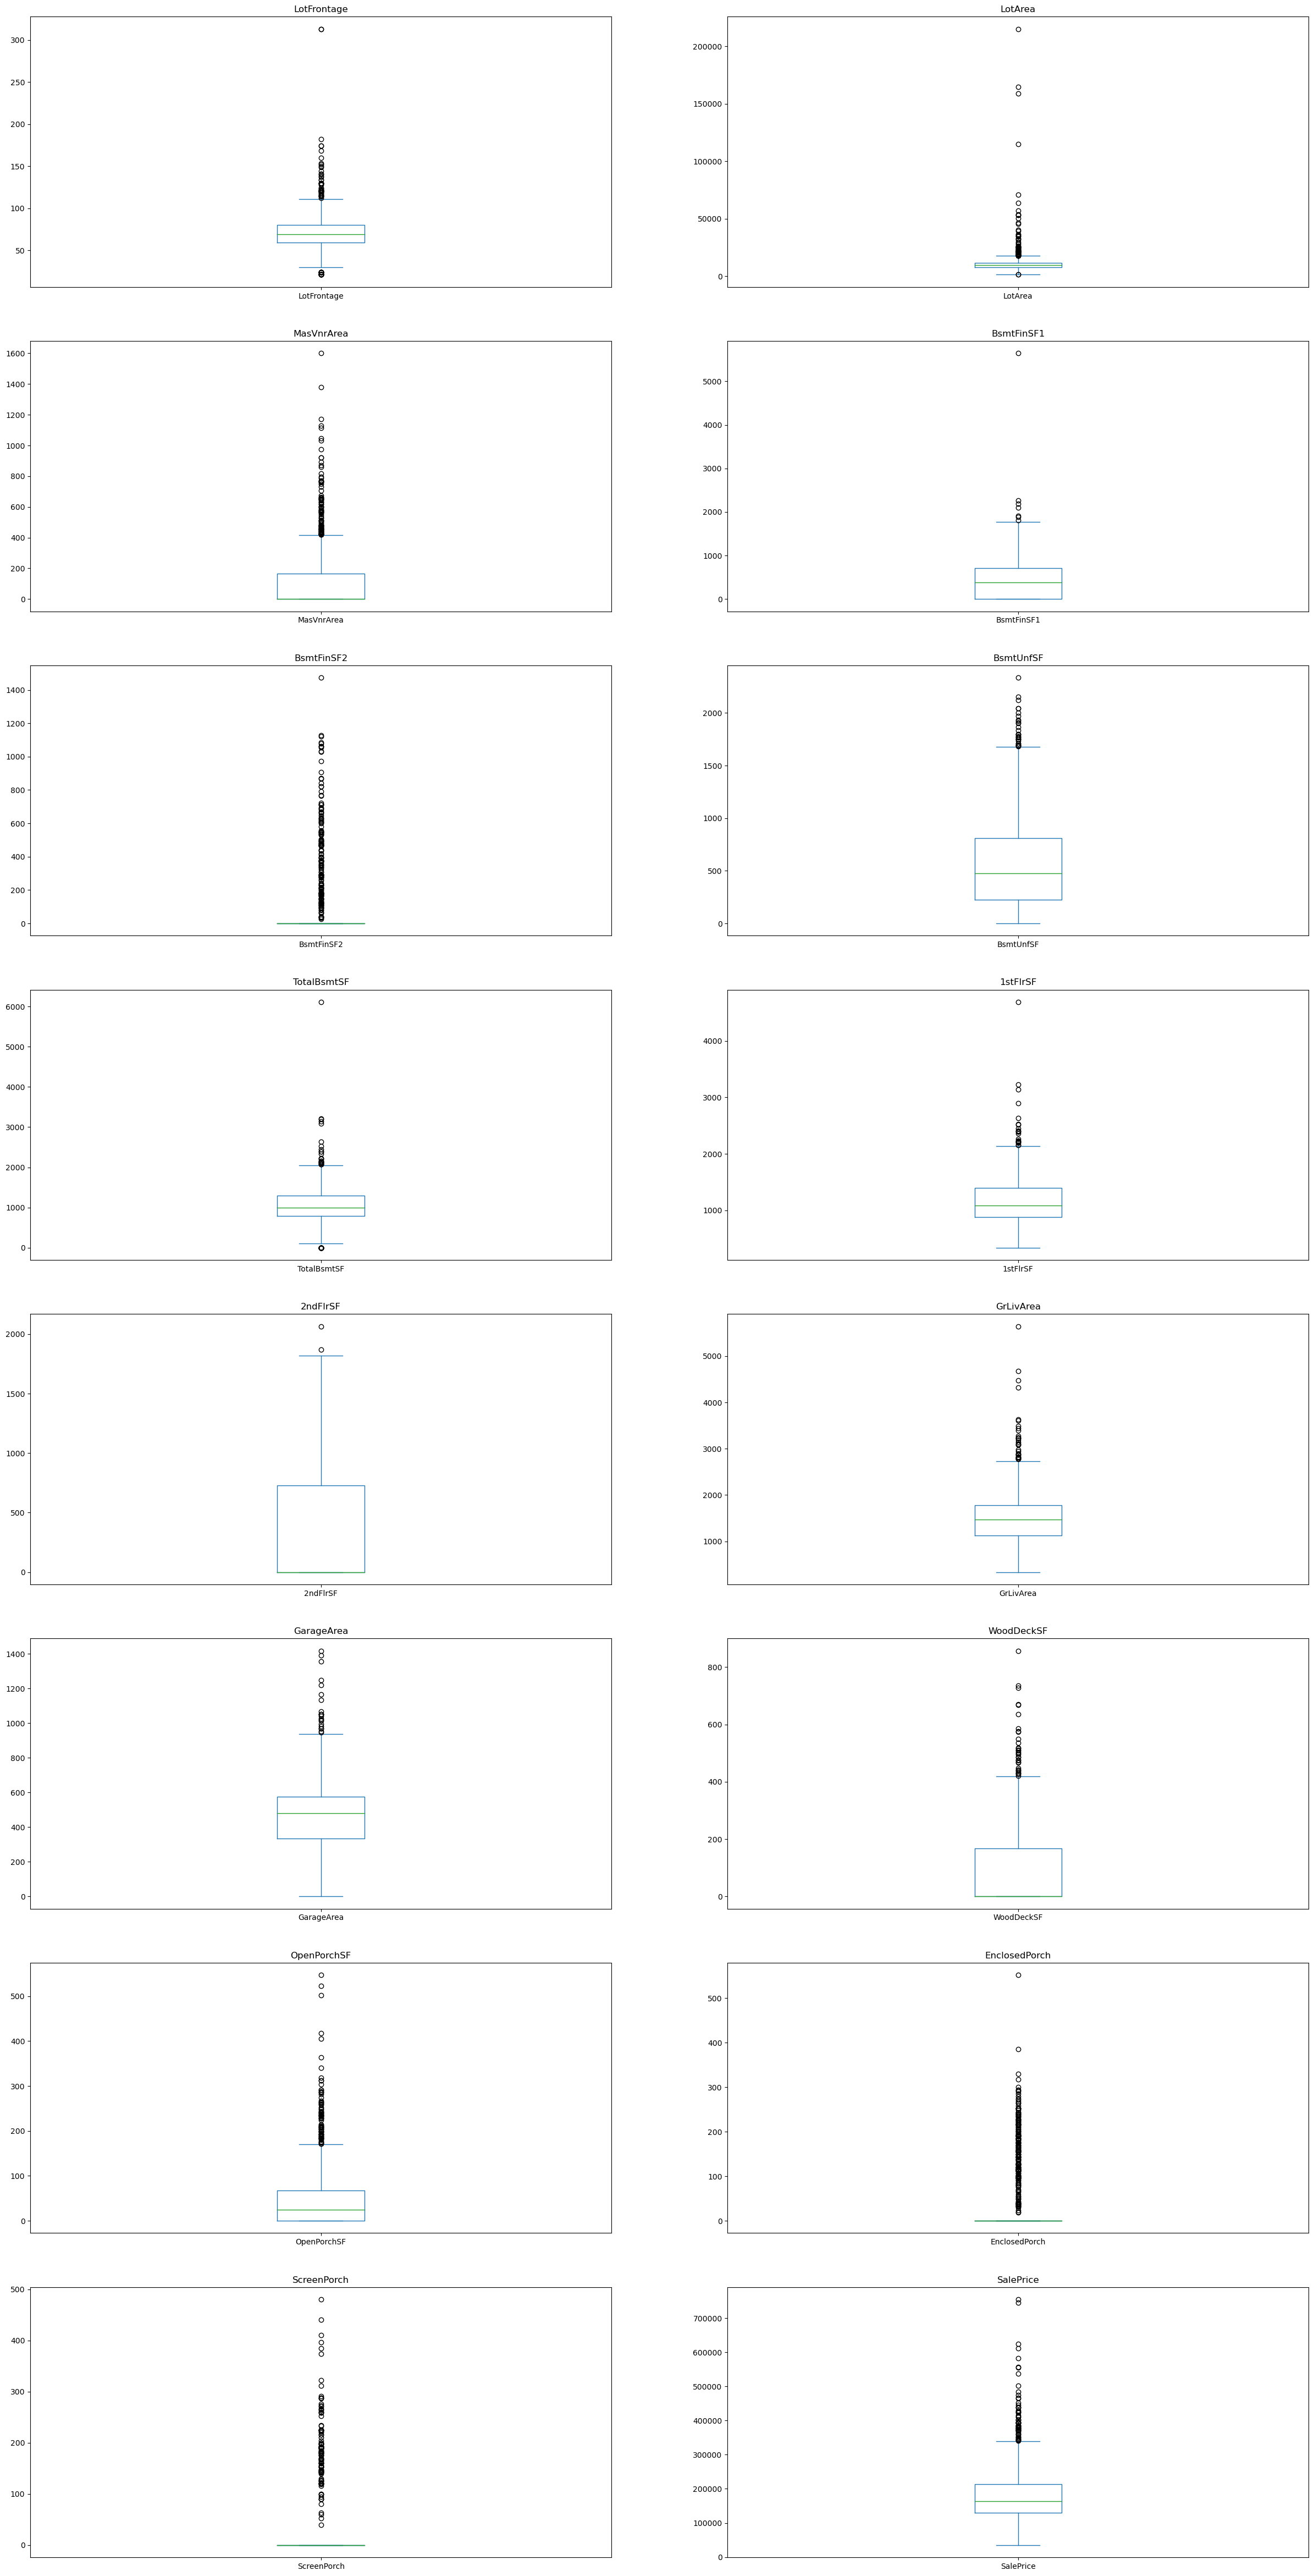

In [133]:
# finding outliers
plt.figure(figsize=(30,60))

for val in enumerate(continous_features) :
        plt.subplot(8,2,val[0]+1)
        numerical_df[val[1]].plot.box()
        plt.title(val[1])
        

### Analysis for continous numerical features

**From the above graphs we can conclude that :**

- Features that have null values are *'LotFrontage', 'MasVnrArea'* and the graphs says that null values have to be filled as they contribute to saleprice
- Outliers are high.So, median imputation does the work for filling null values
- Each and every feature has linear relationship with salesprice. So, we have consider all the features for futher analysis.
- The histograms says that the data is skewed so we have to apply some transormation to the data. So that it will help to increse model accuracy.
